# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: ANN for classifying qwerties

USANDO TENSORFLOW

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')


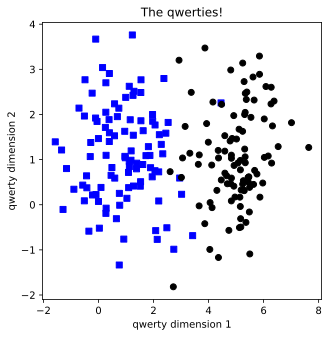

In [2]:
# Create data
nPerClust = 100
blur = 1
A = [1, 1]
B = [5, 1]

# Generate data
a = [A[0] + np.random.randn(nPerClust) * blur, A[1] + np.random.randn(nPerClust) * blur]
b = [B[0] + np.random.randn(nPerClust) * blur, B[1] + np.random.randn(nPerClust) * blur]

# True labels
labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1))))

# Concatenate into a matrix
data_np = np.hstack((a, b)).T

# Convert to a TensorFlow tensor
data = tf.convert_to_tensor(data_np, dtype=tf.float32)
labels = tf.convert_to_tensor(labels_np, dtype=tf.float32)

# Show the data
fig = plt.figure(figsize=(5, 5))
plt.plot(data_np[np.where(labels_np == 0)[0], 0], data_np[np.where(labels_np == 0)[0], 1], 'bs')
plt.plot(data_np[np.where(labels_np == 1)[0], 0], data_np[np.where(labels_np == 1)[0], 1], 'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [3]:
# inspect types
print(type(data_np))
print(np.shape(data_np))
print(' ')

print(type(data))
print(np.shape(data))

<class 'numpy.ndarray'>
(200, 2)
 
<class 'tensorflow.python.framework.ops.EagerTensor'>
(200, 2)


In [4]:
# Build the model
ANNclassify = tf.keras.Sequential([
    tf.keras.layers.Dense(1),   # input layer
    tf.keras.layers.ReLU(),    # activation unit
    tf.keras.layers.Dense(1),   # output unit
    tf.keras.layers.Activation('sigmoid')  # final activation unit
])

In [5]:
# Compile model
learningRate = 0.01
optimizer = tf.keras.optimizers.SGD(learningRate)
lossfun = tf.keras.losses.BinaryCrossentropy()

In [6]:
# Train the model
numepochs = 1000
losses = []

for epochi in range(numepochs):
    with tf.GradientTape() as tape:
        yHat = ANNclassify(data)
        loss = lossfun(labels, yHat)
        losses.append(loss.numpy())

    gradients = tape.gradient(loss, ANNclassify.trainable_variables)
    optimizer.apply_gradients(zip(gradients, ANNclassify.trainable_variables))

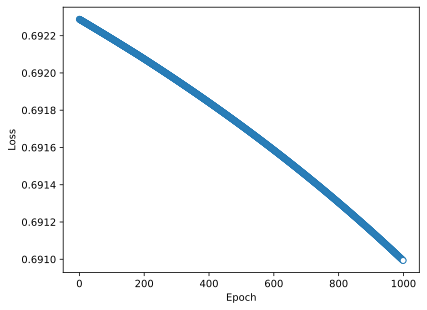

In [7]:
# Show the losses
plt.plot(losses, 'o', markerfacecolor='w', linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [8]:
# Compute the predictions
predictions = ANNclassify(data)
predlabels = predictions > 0.5

# Find errors
misclassified = np.where(predlabels != labels_np)[0]

# Total accuracy
totalacc = 100 - 100 * len(misclassified) / (2 * nPerClust)
print('Final accuracy: {}%'.format(totalacc))

Final accuracy: 56.0%


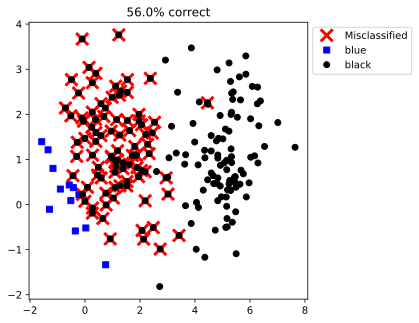

In [9]:
# Plot the labeled data
fig = plt.figure(figsize=(5, 5))
plt.plot(data_np[misclassified, 0], data_np[misclassified, 1], 'rx', markersize=12, markeredgewidth=3)
plt.plot(data_np[np.where(~predlabels.numpy())[0], 0], data_np[np.where(~predlabels.numpy())[0], 1], 'bs')
plt.plot(data_np[np.where(predlabels.numpy())[0], 0], data_np[np.where(predlabels.numpy())[0], 1], 'ko')

plt.legend(['Misclassified', 'blue', 'black'], bbox_to_anchor=(1, 1))
plt.title('{}% correct'.format(totalacc))
plt.show()